## Text Classfication

[Kaggle Comptition Link](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge)

[Dropout Methods](https://mirror-medium.com/?m=https%3A%2F%2Ftowardsdatascience.com%2F12-main-dropout-methods-mathematical-and-visual-explanation-58cdc2112293)

## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

from bs4 import BeautifulSoup
import spacy
import unidecode
from word2number import w2n
import contractions# load spacy model, can be "en_core_web_sm" as well
nlp = spacy.load('en_core_web_md')

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', 100000)

# EDA

In [10]:
Data_toxic = pd.read_csv("data/train.csv")

In [11]:
Data_toxic.sample()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
33161,58471d50d51732a9,"""\n\n Classic \nJimmy Wales stated, """"We need to maintain and improve our quality standards, while at the same time remaining open, friendly, and welcoming as a community. This is a challenge."""" Wikipedia's co-founder Larry Sanger characterizes the Wikipedia community as ineffective and abusive, stating that """"The community does not enforce its own rules effectively or consistently. Consequently, administrators and ordinary participants alike are able essentially to act abusively with impunity, which begets a never-ending cycle of abuse."""" Oliver Kamm, of The Times expressed skepticism toward Wikipedia's reliance on consensus in forming its content: """"Wikipedia seeks not truth but consensus, and like an interminable political meeting the end result will be dominated by the loudest and most persistent voices.""""Wisdom? More like dumbness of the crowds | Oliver Kamm – Times Online (archive version 2011-08-14) (Author’s own copy)\nThe complaints related to the community include the effects of users' anonymity, the attitudes towards newcomers, the abuse of privileges by administrators, biases in the social structure of the community, in particular, gender bias and lack of female contributors, \n\nSounds like they are talking about this article. Good thing some of us are loud and persistent in our calls for neutrality and balance. """,0,0,0,0,0,0


In [12]:
Data_toxic.duplicated().sum()

0

In [13]:
Data_toxic.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [9]:
def get_Catgory_values(data):
    value_count = []
    for i in list(data.columns):
        value_count.append((i , data[i].sum()))
    return pd.DataFrame(value_count , columns=["Label" , "Value count"])    

In [14]:
get_Catgory_values(Data_toxic.iloc[: ,2:])

,Label,Value count
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


In [23]:
def Visualize_categories(data):
    df = Data_toxic.sum(axis=1).value_counts().reset_index()
    plt.bar(df["index"] , df[0])

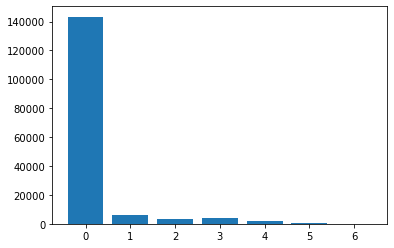

In [26]:
Visualize_categories(Data_toxic.iloc[: ,2:])

## Data Pre-processing 

### Remove stop words

In [27]:
stop_words = stopwords.words('english')
for w in stop_words:
    nlp.vocab[w].is_stop = False

In [28]:
## Pre-processing Function

In [33]:
def text_preprocessing(text): 
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text(separator=" ")
    
    """remove extra whitespaces from text"""
    text = text.strip()
    text =  " ".join(text.split())

    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    
    """expand shortened words, e.g. don't to do not"""
    text = contractions.fix(text)
    
    """keep it all Lower"""
    text = text.lower()
    
    """tokenise text"""
    doc = nlp(text) 
    clean_text = []
    
    for token in doc:
        flag = True
        edit = token.text
        
        """remove stop words"""
        if token.is_stop and token.pos_ != 'NUM': 
            flag = False
            
        """remove punctuations"""    
        if token.pos_ == 'PUNCT' and flag == True: 
            flag = False
            
        """remove special characters """ 
        if token.pos_ == 'SYM' and flag == True: 
            flag = False
            
        """remove numbers"""    
        if (token.pos_ == 'NUM' or token.text.isnumeric()) \
        and flag == True:
            flag = False
            
        """convert number words to numeric numbers"""    
        if token.pos_ == 'NUM' and flag == True:
            edit = w2n.word_to_num(token.text)
            
        # convert tokens to base form     
        elif token.lemma_ != "-PRON-" and flag == True:
            edit = token.lemma_
            
        """append tokens edited and not removed to list """    
        if edit != "" and flag == True:
            clean_text.append(edit) 
        
    return clean_text

In [34]:
Data_toxic["comment_text"] = Data_toxic["comment_text"].apply(lambda x:' '.join(text_preprocessing(x)))

KeyboardInterrupt: 

## Modeling

In [ ]:
from keras import layers,models

model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(15000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
from keras import layers,models

model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(15000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
metrics.